In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nm4p import rk4

In [7]:
### Solve the coupled harmonic oscillator problem

# Spring constants
k1 = 1
k2 = 1
k3 = 1
k4 = 1

# Spring rest lengths
L1 = 2
L2 = 2
L3 = 1
L4 = 1

# Total length of system
Lw = 10

K = np.array([[-k1 - k2, k2, 0.],
			   [k2, -k2 - k3, k3],
			   [0., k3, -k3 - k4]])

b = np.array([[-k1 * L1 + k2 * L2],
			  [-k2 * L2 + k3 * L3],
			  [-k3 * L3 - (Lw - L4) * k4]])

# Finding the rest lengths means setting F = 0

F = np.array([[0.], [0.], [0.]])

LHS = F + b
disp = np.linalg.solve(K, LHS)
print(disp)

# Initial system conditions
x1_0 = disp[0] + 0.5
x2_0 = disp[1] 
x3_0 = disp[2]
v1_0 = 0.
v2_0 = 0.
v3_0 = 0.
m1 = 0.1
m2 = 0.1
m3 = 0.1

# Other system parameters
tau = 0.05
time = 0.
nsteps = 100
params = np.array([k1, k2, k3, k4, L1, L2, L3, L4, Lw, m1, m2, m3])
state = np.array([x1_0, x2_0, x3_0, v1_0, v2_0, v3_0])
xplot = np.empty((3, nsteps))
tplot = np.empty(nsteps)

for i in range(nsteps):
	xplot[0, i] = state[0]
	xplot[1, i] = state[1]
	xplot[2, i] = state[2]
	tplot[i] = time
	state = rk4(state, time, tau, params)
	time += tau

[[3.]
 [6.]
 [8.]]


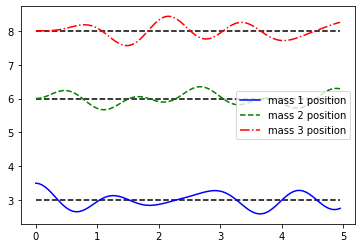

In [8]:
plt.plot(tplot, xplot[0, :], 'b-', label='mass 1 position')
plt.plot(tplot, xplot[1, :], 'g--', label='mass 2 position')
plt.plot(tplot, xplot[2, :], 'r-.', label='mass 3 position')
plt.hlines(disp[0], tplot[0], tplot[-1], 'k', '--')
plt.hlines(disp[1], tplot[0], tplot[-1], 'k', '--')
plt.hlines(disp[2], tplot[0], tplot[-1], 'k', '--')
plt.legend()
plt.show()

In [9]:
xplot[0]

array([3.5       , 3.4875651 , 3.45103409, 3.3926696 , 3.31606774,
       3.22590941, 3.12763846, 3.02709046, 2.93009917, 2.84210967,
       2.7678256 , 2.71091577, 2.67379996, 2.65752791, 2.66175804,
       2.68483483, 2.72395651, 2.77541796, 2.83490856, 2.89784102,
       2.95968568, 3.01628507, 3.06412607, 3.10055077, 3.12389312,
       3.13353414, 3.12987583, 3.11423982, 3.08870295, 3.05588626,
       3.01871704, 2.98018478, 2.94311128, 2.90995305, 2.88265047,
       2.86253313, 2.85028566, 2.84597249, 2.84911501, 2.85880974,
       2.87387337, 2.89299826, 2.91490196, 2.93845568, 2.96277921,
       2.9872938 , 3.01172919, 3.0360856 , 3.0605568 , 3.08542399,
       3.1109337 , 3.1371747 , 3.16396924, 3.19079255, 3.21673235,
       3.24049576, 3.26046673, 3.27481172, 3.2816265 , 3.27911215,
       3.26576507, 3.24056318, 3.20313018, 3.15386039, 3.09398947,
       3.02560035, 2.95155892, 2.87537974, 2.80102849, 2.73267328,
       2.67440219, 2.6299279 , 2.60230244, 2.59366519, 2.60504

In [ ]:
state